# Housing Price Prediction With Neural Networks

In [2]:
import warnings
import tensorflow as tf
tf.config.set_visible_devices([], 'GPU')
# Suppress warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [4]:
# Load the dataset
california_housing = fetch_california_housing()
X = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
y = california_housing.target

display(X.head())

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [5]:
# Print summary statistics of the target variable
print("\nSummary statistics of the target variable:")
display(pd.Series(y).describe())


Summary statistics of the target variable:


count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
dtype: float64

In [7]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer for regression

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=0)

# Evaluate the model
loss, mae = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test MAE: {mae}")

Test MAE: 0.36619675159454346


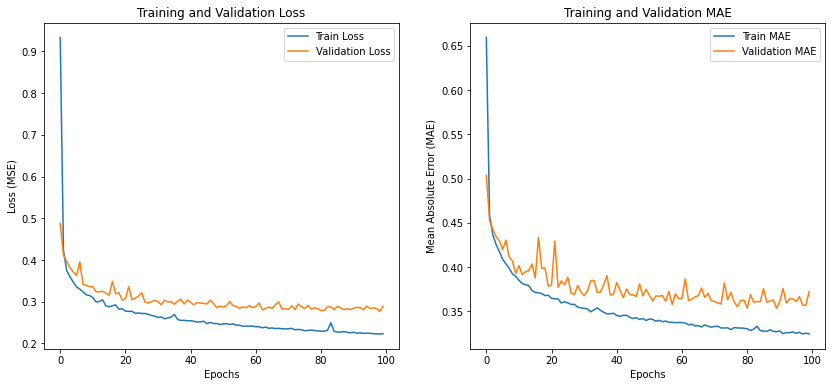

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step


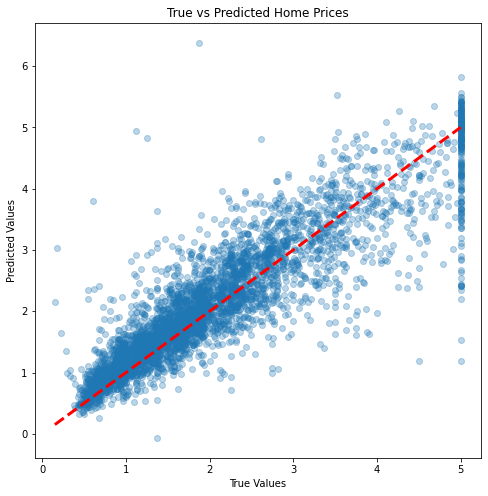

In [8]:
# Plot training history
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Training and Validation MAE')
plt.legend()

plt.show()

# Predict on test data
y_pred = model.predict(X_test_scaled)

# Plot true vs predicted values
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Home Prices')
plt.show()

# Convolutional Neural Network Example

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import mixed_precision

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Define dataset paths
base_dir = 'chest_xray/'  # Adjust the path if necessary
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# Function to load and preprocess images
def load_images_from_folder(folder, label, img_size=(64, 64)):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.resize(img, img_size)
            img = img.astype('float32') / 255.0
            images.append(img)
            labels.append(label)
    return images, labels

# Load a subset of train images
train_pneumonia_images, train_pneumonia_labels = load_images_from_folder(os.path.join(train_dir, 'PNEUMONIA'), 1, img_size=(64, 64))
train_normal_images, train_normal_labels = load_images_from_folder(os.path.join(train_dir, 'NORMAL'), 0, img_size=(64, 64))

# Load a subset of validation images
val_pneumonia_images, val_pneumonia_labels = load_images_from_folder(os.path.join(val_dir, 'PNEUMONIA'), 1, img_size=(64, 64))
val_normal_images, val_normal_labels = load_images_from_folder(os.path.join(val_dir, 'NORMAL'), 0, img_size=(64, 64))

# Load a subset of test images
test_pneumonia_images, test_pneumonia_labels = load_images_from_folder(os.path.join(test_dir, 'PNEUMONIA'), 1, img_size=(64, 64))
test_normal_images, test_normal_labels = load_images_from_folder(os.path.join(test_dir, 'NORMAL'), 0, img_size=(64, 64))

# Combine and create train, validation, and test sets
X_train = np.array(train_pneumonia_images[:500] + train_normal_images[:500])
y_train = np.array(train_pneumonia_labels[:500] + train_normal_labels[:500])

X_val = np.array(val_pneumonia_images[:100] + val_normal_images[:100])
y_val = np.array(val_pneumonia_labels[:100] + val_normal_labels[:100])

X_test = np.array(test_pneumonia_images[:100] + test_normal_images[:100])
y_test = np.array(test_pneumonia_labels[:100] + test_normal_labels[:100])

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)

# Set mixed precision policy
policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_global_policy(policy)

# Build the CNN model
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid', dtype='float32')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)

# Train the model
history = model.fit(datagen.flow(X_train, y_train, batch_size=32), 
                    validation_data=(X_val, y_val), 
                    epochs=10, 
                    callbacks=[early_stopping, reduce_lr],
                    verbose=2)

# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy}")

Epoch 1/10
32/32 - 18s - 572ms/step - accuracy: 0.5660 - loss: 0.6825 - val_accuracy: 0.5625 - val_loss: 0.6622 - learning_rate: 0.0010
Epoch 2/10
32/32 - 16s - 491ms/step - accuracy: 0.7100 - loss: 0.5746 - val_accuracy: 0.7500 - val_loss: 0.5256 - learning_rate: 0.0010
Epoch 3/10
32/32 - 16s - 496ms/step - accuracy: 0.7950 - loss: 0.4778 - val_accuracy: 0.6875 - val_loss: 0.5441 - learning_rate: 0.0010
Epoch 4/10
32/32 - 16s - 492ms/step - accuracy: 0.7940 - loss: 0.4741 - val_accuracy: 0.8750 - val_loss: 0.4261 - learning_rate: 0.0010
Epoch 5/10
32/32 - 16s - 494ms/step - accuracy: 0.8590 - loss: 0.3728 - val_accuracy: 0.7500 - val_loss: 0.3824 - learning_rate: 0.0010
Epoch 6/10
32/32 - 16s - 498ms/step - accuracy: 0.8150 - loss: 0.4471 - val_accuracy: 0.8750 - val_loss: 0.4026 - learning_rate: 0.0010
Epoch 7/10
32/32 - 16s - 492ms/step - accuracy: 0.8720 - loss: 0.3626 - val_accuracy: 0.8125 - val_loss: 0.3130 - learning_rate: 0.0010
Epoch 8/10
32/32 - 16s - 494ms/step - accuracy: 

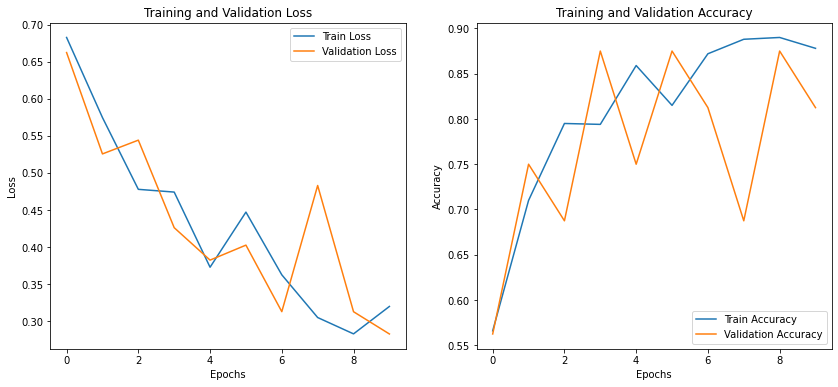

In [10]:
# Plot training and validation history
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


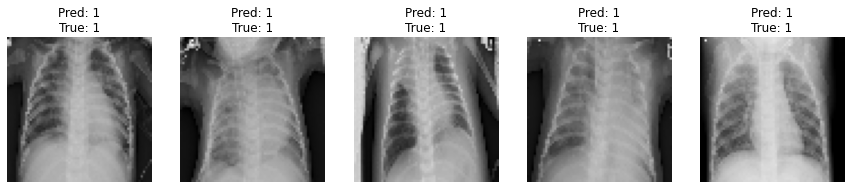

In [11]:
# Predict on test data and plot results
y_pred = model.predict(X_test)
y_pred_class = (y_pred > 0.5).astype("int32")

# Plot some predictions
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    axes[i].imshow(X_test[i])
    axes[i].set_title(f"Pred: {y_pred_class[i][0]}\nTrue: {y_test[i]}")
    axes[i].axis('off')
plt.show()

# Predicting Stock Prices with Recurrent Neural Networks

In [12]:
# Import necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM
import matplotlib.pyplot as plt
import yfinance as yf

# Function to fetch stock data
def fetch_stock_data(ticker):
    stock_data = yf.download(ticker, start="2020-01-01", end="2023-01-01")
    return stock_data['Close']

# Fetch data for a specific stock, e.g., Apple Inc.
stock_data = fetch_stock_data('AAPL')
display(stock_data.head())

[*********************100%%**********************]  1 of 1 completed


Date
2020-01-02    75.087502
2020-01-03    74.357498
2020-01-06    74.949997
2020-01-07    74.597504
2020-01-08    75.797501
Name: Close, dtype: float64

In [14]:
# Preprocess the data
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step)]
        X.append(a)
        Y.append(data[i + time_step])
    return np.array(X), np.array(Y)

# Convert stock data to a numpy array
data = stock_data.values
data = data.reshape(-1, 1)

# Normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

# Split the data into training and testing sets
training_size = int(len(data) * 0.65)
test_size = len(data) - training_size
train_data, test_data = data[0:training_size, :], data[training_size:len(data), :1]

# Create datasets for training and testing
time_step = 10
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape input to be [samples, time steps, features] which is required for RNN
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build and compile the RNN model
model = Sequential()
model.add(SimpleRNN(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(SimpleRNN(50, return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=0)

# Predict the stock prices
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


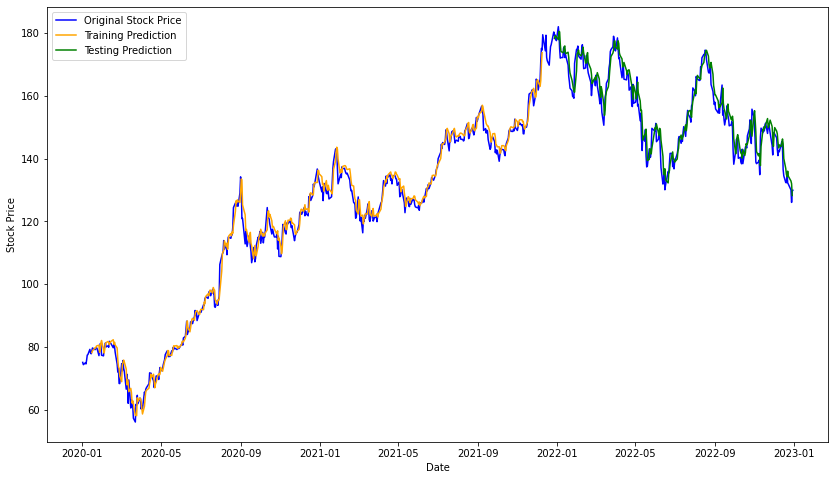

In [15]:
# Plot the results
plt.figure(figsize=(14, 8))

# Plot the original stock prices
plt.plot(stock_data.index, stock_data.values, label='Original Stock Price', color='blue')

# Create a series of the same length as the original data and set predictions in the right place
train_predict_plot = np.empty_like(data)
train_predict_plot[:, :] = np.nan
train_predict_plot[time_step:len(train_predict) + time_step, :] = train_predict

test_predict_plot = np.empty_like(data)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (time_step * 2) + 1:len(data) - 1, :] = test_predict
# Plot the training predictions
plt.plot(stock_data.index, train_predict_plot, label='Training Prediction', color='orange')

# Plot the testing predictions
plt.plot(stock_data.index, test_predict_plot, label='Testing Prediction', color='green')

# Add labels and legends
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Text Classification with Transformers

In [16]:
import numpy as np
import pandas as pd
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments
from datasets import load_dataset, load_metric

# Load the IMDb dataset
dataset = load_dataset("imdb")

# Use a subset of the dataset for faster training
small_train_dataset = dataset['train'].shuffle(seed=42).select([i for i in list(range(1000))])
small_test_dataset = dataset['test'].shuffle(seed=42).select([i for i in list(range(1000))])

# Load the DistilBERT tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# Preprocess the data
def tokenize_function(examples):
    return tokenizer(examples['text'], padding='max_length', truncation=True)

tokenized_train = small_train_dataset.map(tokenize_function, batched=True)
tokenized_test = small_test_dataset.map(tokenize_function, batched=True)

# Define the model
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

# Define the training arguments
training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=1,
    weight_decay=0.01,
)

# Define the accuracy metric
metric = load_metric("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

# Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_test,
    compute_metrics=compute_metrics,
)

# Train the model
trainer.train()

# Evaluate the model
eval_results = trainer.evaluate()

print(f"Evaluation results: {eval_results}")

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.bias', 'vocab_projector.bias', 'vocab_transform.weight', 'vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'pre_classifier.bias', 'classifier.w

Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.403563,0.857000


The following columns in the evaluation set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1000
  Batch size = 8


Training completed. Do not forget to share your model on huggingface.co/models =)


The following columns in the evaluation set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1000
  Batch size = 8


Evaluation results: {'eval_loss': 0.40356332063674927, 'eval_accuracy': 0.857, 'eval_runtime': 221.1277, 'eval_samples_per_second': 4.522, 'eval_steps_per_second': 0.565, 'epoch': 1.0}


In [17]:
# Make predictions
predictions = trainer.predict(tokenized_test)
pred_labels = np.argmax(predictions.predictions, axis=1)

# Display a few example predictions
for i in range(2):
    print(f"Review: {small_test_dataset[i]['text']}")
    print(f"Predicted sentiment: {'positive' if pred_labels[i] == 1 else 'negative'}")
    print(f"Actual sentiment: {'positive' if small_test_dataset[i]['label'] == 1 else 'negative'}")
    print("-----")

The following columns in the test set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 1000
  Batch size = 8


Review: <br /><br />When I unsuspectedly rented A Thousand Acres, I thought I was in for an entertaining King Lear story and of course Michelle Pfeiffer was in it, so what could go wrong?<br /><br />Very quickly, however, I realized that this story was about A Thousand Other Things besides just Acres. I started crying and couldn't stop until long after the movie ended. Thank you Jane, Laura and Jocelyn, for bringing us such a wonderfully subtle and compassionate movie! Thank you cast, for being involved and portraying the characters with such depth and gentleness!<br /><br />I recognized the Angry sister; the Runaway sister and the sister in Denial. I recognized the Abusive Husband and why he was there and then the Father, oh oh the Father... all superbly played. I also recognized myself and this movie was an eye-opener, a relief, a chance to face my OWN truth and finally doing something about it. I truly hope A Thousand Acres has had the same effect on some others out there.<br /><br 